# Before we get the data and start exploring it, let's download all the libraries that we will need.

In [67]:
import seaborn as sns
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
%matplotlib inline
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
my_file = project.get_file("Motor_Vehicle_Collisions.csv")
my_file.seek(0)
df = pd.read_csv(my_file)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,7/12/2019,0:00,BRONX,10472,40.831623,-73.86726,"(40.831623, -73.86726)",WESTCHESTER AVENUE,SAINT LAWRENCE AVENUE,NaN,...,NaN,NaN,NaN,NaN,4168556,Sedan,NaN,NaN,NaN,NaN
1,7/12/2019,0:00,BROOKLYN,11207,40.669792,-73.89240,"(40.669792, -73.8924)",SUTTER AVENUE,WYONA STREET,NaN,...,Unspecified,NaN,NaN,NaN,4169745,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2,7/12/2019,0:00,BROOKLYN,11234,40.618717,-73.93262,"(40.618717, -73.93262)",NaN,NaN,2098 FLATBUSH AVENUE,...,Unspecified,NaN,NaN,NaN,4169938,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,7/12/2019,0:00,NaN,NaN,40.829155,-73.93728,"(40.829155, -73.93728)",8 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4169906,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,7/12/2019,0:00,NaN,NaN,40.718987,-73.94635,"(40.718987, -73.94635)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4168595,Sedan,Sedan,NaN,NaN,NaN


In [4]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [5]:
# size of dataframe (rows, columns)
df.shape    

(1048575, 29)

### Data manipulation

In [6]:
## Rename columns
df.rename(columns = {'ZIP CODE'          : 'ZIP_CODE',
                       'ON STREET NAME'    : 'STREET_ON',
                       'CROSS STREET NAME' : 'STREET_CROSS',
                       'OFF STREET NAME'   : 'STREET_OFF',
                       'NUMBER OF PERSONS INJURED'     : 'NUM_PER_INJUR',
                       'NUMBER OF PERSONS KILLED'      : 'NUM_PER_KILL',
                       'NUMBER OF PEDESTRIANS INJURED' : 'NUM_PED_INJUR',
                       'NUMBER OF PEDESTRIANS KILLED'  : 'NUM_PED_KILL',
                       'NUMBER OF CYCLIST INJURED'     : 'NUM_CYC_INJUR',
                       'NUMBER OF CYCLIST KILLED'      : 'NUM_CYC_KILL',
                       'NUMBER OF MOTORIST INJURED'    : 'NUM_MOTOR_INJUR',
                       'NUMBER OF MOTORIST KILLED'     : 'NUM_MOTOR_KILL',
                       'CONTRIBUTING FACTOR VEHICLE 1' : 'VEH_FACTOR_1',
                       'CONTRIBUTING FACTOR VEHICLE 2' : 'VEH_FACTOR_2',
                       'CONTRIBUTING FACTOR VEHICLE 3' : 'VEH_FACTOR_3',
                       'CONTRIBUTING FACTOR VEHICLE 4' : 'VEH_FACTOR_4',
                       'CONTRIBUTING FACTOR VEHICLE 5' : 'VEH_FACTOR_5',
                       'UNIQUE KEY' : 'UNIQUE_KEY',
                       'VEHICLE TYPE CODE 1' : 'VEH_TYPE_1',
                       'VEHICLE TYPE CODE 2' : 'VEH_TYPE_2',
                       'VEHICLE TYPE CODE 3' : 'VEH_TYPE_3',
                       'VEHICLE TYPE CODE 4' : 'VEH_TYPE_4',
                       'VEHICLE TYPE CODE 5' : 'VEH_TYPE_5'},
           inplace = True) 

In [7]:
df.drop(['ZIP_CODE', 'STREET_ON', 'STREET_CROSS', 'STREET_OFF', 'VEH_FACTOR_1', 'VEH_FACTOR_2', 'VEH_FACTOR_3', 'VEH_FACTOR_4', 'VEH_FACTOR_5', 'UNIQUE_KEY', 'VEH_TYPE_1', 'VEH_TYPE_2', 'VEH_TYPE_3', 'VEH_TYPE_4', 'VEH_TYPE_5'], axis=1, inplace=True)

In [8]:
df.tail(5)

,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL
1048570,11/16/2014,5:40,BRONX,40.816775,-73.809126,"(40.8167754, -73.8091258)",1.0,0.0,1,0,0,0,0,0
1048571,11/16/2014,6:00,QUEENS,40.766446,-73.829089,"(40.7664463, -73.8290893)",0.0,0.0,0,0,0,0,0,0
1048572,11/16/2014,6:00,NaN,40.759949,-73.838690,"(40.7599494, -73.8386902)",0.0,0.0,0,0,0,0,0,0
1048573,11/16/2014,6:00,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0
1048574,11/16/2014,6:30,NaN,40.759949,-73.838690,"(40.7599494, -73.8386902)",0.0,0.0,0,0,0,0,0,0


In [9]:

# delete all rows for which column 'NUM_PER_INJUR' has value 0, NUM_PER_KILL=0, NUM_PED_INJUR=0 , NUM_PED_KILL=0, NUM_CYC_INJUR=0, NUM_CYC_KILL=0, NUM_MOTOR_INJUR=0 and NUM_MOTOR_KILL=0
indexNames = df[ (df['NUM_PER_INJUR'] == 0.0) & (df['NUM_PER_KILL'] == 0.0) & (df['NUM_PED_INJUR'] == 0) & (df['NUM_PED_KILL'] == 0) & (df['NUM_CYC_INJUR'] == 0) & (df['NUM_CYC_KILL'] == 0) & (df['NUM_MOTOR_INJUR'] == 0) & (df['NUM_MOTOR_KILL'] == 0)].index
 
df.drop(indexNames , inplace=True)

In [10]:
df.shape

(200727, 14)

In [11]:

# Drop all rows that have any NaN (missing) values, drop the rows even with single NaN or single missing values.
df = df.dropna()
df.tail(2)
df.shape

(125164, 14)

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape

(124868, 14)

In [13]:
df.BOROUGH.value_counts()

BROOKLYN         43602
QUEENS           35364
MANHATTAN        21882
BRONX            19231
STATEN ISLAND     4789
Name: BOROUGH, dtype: int64

In [14]:
df.BOROUGH.value_counts(normalize = True)

BROOKLYN         0.349185
QUEENS           0.283211
MANHATTAN        0.175241
BRONX            0.154011
STATEN ISLAND    0.038353
Name: BOROUGH, dtype: float64

Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 14. This makes it very difficult to do a query by a specific Borough.

This can be fixed very easily by setting the 'Borough' column as the index using `set_index()` method.

In [15]:
# Create variables
## Create year variable to "YEAR"
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
## Create month variable to "DATE_MTH"
df['DATE_MTH']  = pd.to_datetime(df['DATE']).dt.month

## Create time variable to O'Clock format
df['TIME_O'] = df['TIME'].apply(lambda time: time.split(':')[0])

time_dict = {'0' : 'A 0 O Clock', '1' : 'B 1 O Clock', '2' : 'C 2 O Clock',
             '3' : 'D 3 O Clock', '4' : 'E 4 O Clock', '5' : 'F 5 O Clock',
             '6' : 'G 6 O Clock', '7' : 'H 7 O Clock', '8' : 'I 8 O Clock',
             '9' : 'J 9 O Clock', '10' : 'K 10 O Clock', '11' : 'L 11 O Clock',
             '12' : 'M 12 O Clock', '13' : 'N 13 O Clock', '14' : 'O 14 Clock',
             '15' : 'P 15 O Clock', '16' : 'Q 16 O Clock', '17' : 'R 17 O Clock',
             '18' : 'S 18 O Clock', '19' : 'T 19 O Clock', '20' : 'U 20 O Clock',
             '21' : 'V 21 O Clock', '22' : 'W 22 O Clock', '23' : 'X 23 O Clock' }
        
df['TIME_GRP'] = df['TIME_O'].map({value : key for value, key in time_dict.items()})

In [16]:
# Recheck columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124868 entries, 9 to 1048570
Data columns (total 18 columns):
DATE               124868 non-null object
TIME               124868 non-null object
BOROUGH            124868 non-null object
LATITUDE           124868 non-null float64
LONGITUDE          124868 non-null float64
LOCATION           124868 non-null object
NUM_PER_INJUR      124868 non-null float64
NUM_PER_KILL       124868 non-null float64
NUM_PED_INJUR      124868 non-null int64
NUM_PED_KILL       124868 non-null int64
NUM_CYC_INJUR      124868 non-null int64
NUM_CYC_KILL       124868 non-null int64
NUM_MOTOR_INJUR    124868 non-null int64
NUM_MOTOR_KILL     124868 non-null int64
YEAR               124868 non-null int64
DATE_MTH           124868 non-null int64
TIME_O             124868 non-null object
TIME_GRP           124868 non-null object
dtypes: float64(4), int64(8), object(6)
memory usage: 18.1+ MB


In this step, the columns are renamed so that we can recall variables easier. I also create new variables including year, month and time (O'Clock) of accident for future analysis. 

Text(0.5, 1.0, 'Number of cyclist kill')

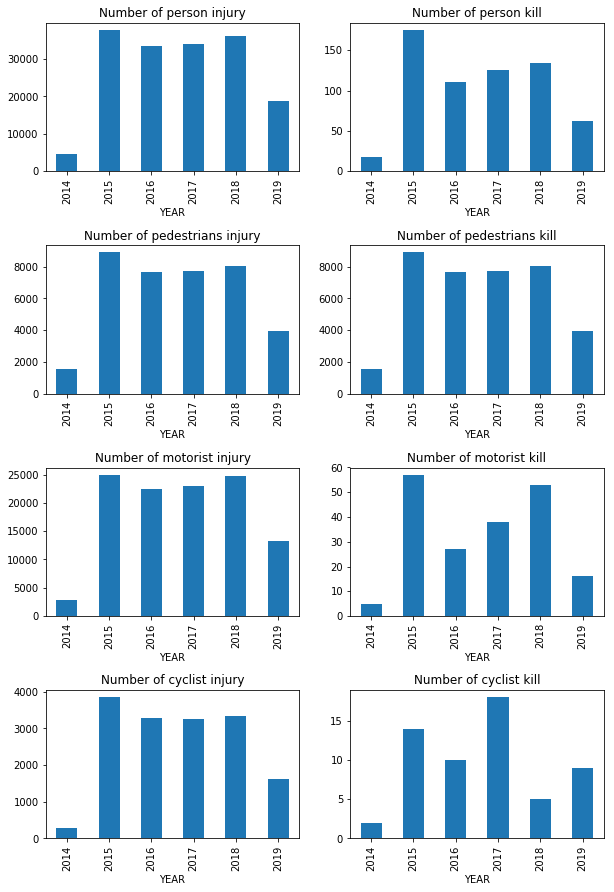

In [17]:
# Preliminary analysis
## Create bar plot by year
## Set subplot size and space
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5)

# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('YEAR').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person kill by year
plt.subplot(4, 2, 2)
df.groupby('YEAR').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 4)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 5)
df.groupby('YEAR').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 6)
df.groupby('YEAR').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 7)
df.groupby('YEAR').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 8)
df.groupby('YEAR').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

Let's start visualizing the effect of motor vehicle accidents in New york city. NYC suffered widespread motor vehicle accidents which caused number of persons to death and injury. Let's analyze the effect of this crisis, and compare NYC motor vehicle accidents by borough. Let's do that using a bar charts for the years 2014 - 2019. Ignoring 2019 (since it is not full year data), there is increasing trend of number of person injury but not for number of person killed



Text(0.5, 1.0, 'Number of cyclist kill')

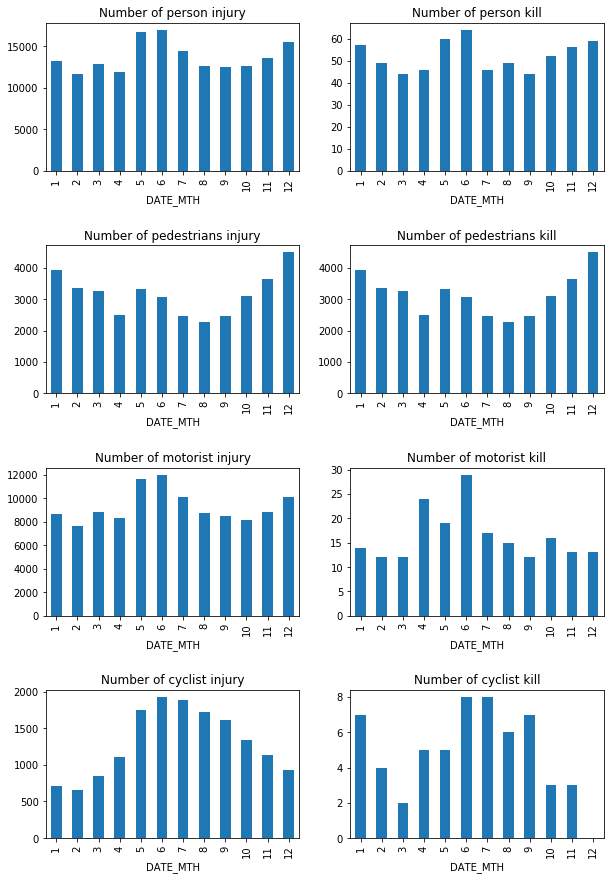

In [18]:
# Preliminary analysis
## Create bar plot by month

## Set subplot size and space
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5)

# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('DATE_MTH').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person kill by year
plt.subplot(4, 2, 2)
df.groupby('DATE_MTH').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('DATE_MTH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 4)
df.groupby('DATE_MTH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 5)
df.groupby('DATE_MTH').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 6)
df.groupby('DATE_MTH').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 7)
df.groupby('DATE_MTH').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 8)
df.groupby('DATE_MTH').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

From the above bar chart, we can see that during July-Oct are months that have high number of person injury and also Sep is the month that have the most killed during the year.

,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL,NUM_CYC_INJUR,NUM_CYC_KILL
BOROUGH,,,,,,,,
BRONX,26496.0,83.0,6193,44,18772,32,1530,7
BROOKLYN,58419.0,206.0,12829,123,39448,59,6158,25
MANHATTAN,25925.0,113.0,8690,85,12607,15,4648,13
QUEENS,47427.0,185.0,9130,105,35209,69,3093,11
STATEN ISLAND,6617.0,39.0,1001,16,5436,21,179,2


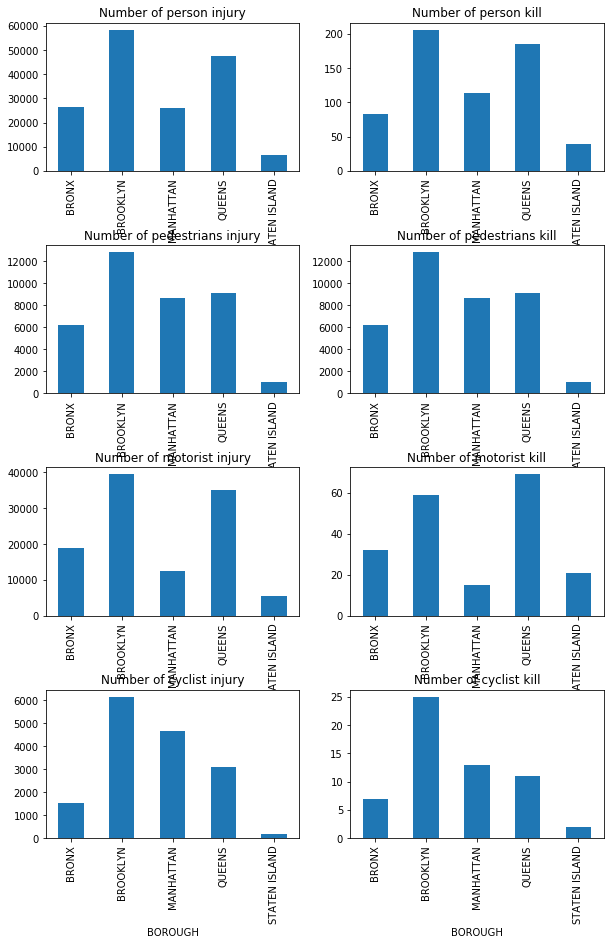

In [19]:
# Preliminary analysis
## Create bar plot by BOROUGH categories

## Set subplot size and space
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5)

# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('BOROUGH').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person kill by year
plt.subplot(4, 2, 2)
df.groupby('BOROUGH').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('BOROUGH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 4)
df.groupby('BOROUGH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 5)
df.groupby('BOROUGH').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 6)
df.groupby('BOROUGH').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 7)
df.groupby('BOROUGH').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 8)
df.groupby('BOROUGH').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

# Create summary table by time in a day
df.groupby('BOROUGH').sum()[["NUM_PER_INJUR", "NUM_PER_KILL", "NUM_PED_INJUR", "NUM_PED_KILL", 
                                "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]

In [20]:

# group df by boroughs and apply sum() function 
df_borough = df.groupby('BOROUGH', axis=0).sum()[["NUM_PER_INJUR", "NUM_PER_KILL", "NUM_PED_INJUR", "NUM_PED_KILL", 
                                "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]
df_borough.head()

,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL,NUM_CYC_INJUR,NUM_CYC_KILL
BOROUGH,,,,,,,,
BRONX,26496.0,83.0,6193,44,18772,32,1530,7
BROOKLYN,58419.0,206.0,12829,123,39448,59,6158,25
MANHATTAN,25925.0,113.0,8690,85,12607,15,4648,13
QUEENS,47427.0,185.0,9130,105,35209,69,3093,11
STATEN ISLAND,6617.0,39.0,1001,16,5436,21,179,2


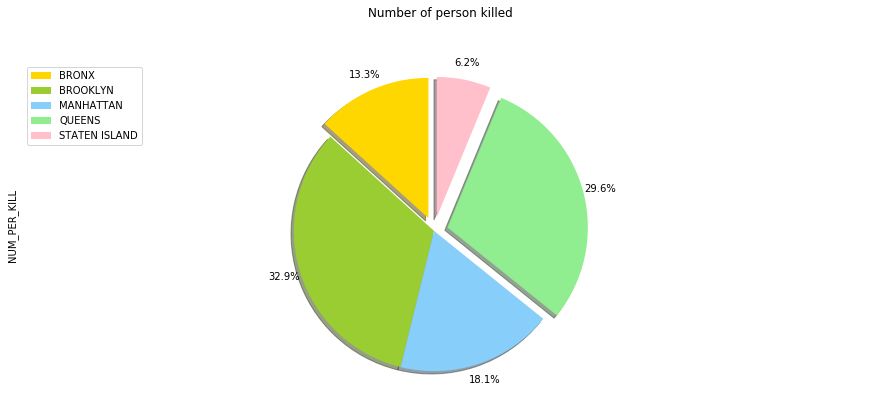

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_borough['NUM_PER_KILL'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Number of person killed', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_borough.index, loc='upper left') 

plt.show()


A `pie chart` is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. Let's use a pie chart to explore the proportion (percentage) of number of person killed grouped by borough for the entire time period from 2014 to 2019. Using the above pie chart, the smallest number of persons killed occurred in STATEN ISLAND (6.2%) and the highest number of persons killed is in BROOKLYN (32.9%)

Text(0, 0.5, 'number killed')

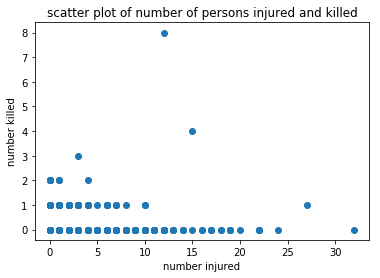

In [22]:
plt.scatter(df["NUM_PER_INJUR"], df["NUM_PER_KILL"])
plt.title("scatter plot of number of persons injured and killed")
plt.xlabel("number injured")
plt.ylabel("number killed")

We can show the distribution of accidents using a scatter plot; the Y-axis indicates number of persons killed and the X-axis shows number of persons injured. A scatter plot is a useful method of comparing variables against each other. The data in a scatter plot is considered to express a trend. Notice how the scatter plot does not connect the datapoints together. As shown in the figure above there seems to be week correlation between number of persons injured and number killed since there is no pattern in the data as the number of persons injured go by, the number of people killed doesn't show any trend. Also the data points are very scattered, showing lots of variability. We can examine the correlation between number of persons unjured and number of persons killed and it is approximately 0.224. We can calculate the correlation between ...using the method "corr".

In [23]:
df[['NUM_PER_INJUR', 'NUM_PER_KILL', 'NUM_PED_INJUR', 'NUM_PED_KILL', 'NUM_CYC_INJUR', 'NUM_CYC_KILL', 'NUM_MOTOR_INJUR', 'NUM_MOTOR_KILL']].corr()  


,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL
NUM_PER_INJUR,1.000000,-0.045319,-0.130552,-0.045317,-0.129823,-0.017002,0.872942,-0.011213
NUM_PER_KILL,-0.045319,1.000000,-0.011713,0.788259,-0.020409,0.346812,-0.023313,0.548353
NUM_PED_INJUR,-0.130552,-0.011713,1.000000,0.000270,-0.224594,-0.002640,-0.492941,-0.020584
NUM_PED_KILL,-0.045317,0.788259,0.000270,1.000000,-0.016559,0.075249,-0.030039,0.011563
NUM_CYC_INJUR,-0.129823,-0.020409,-0.224594,-0.016559,1.000000,-0.000274,-0.307898,-0.014282
NUM_CYC_KILL,-0.017002,0.346812,-0.002640,0.075249,-0.000274,1.000000,-0.011852,-0.000808
NUM_MOTOR_INJUR,0.872942,-0.023313,-0.492941,-0.030039,-0.307898,-0.011852,1.000000,0.005447
NUM_MOTOR_KILL,-0.011213,0.548353,-0.020584,0.011563,-0.014282,-0.000808,0.005447,1.000000


As the number of motorist injured goes up, the number of persons injured goes up (the correlation coefficient is positive and it is approximately 0.89): this indicates a positive relationship between these two variables. As the number of persons injured increases the number of persons killed also increases as these two variables have a positive correlation coefficient, but there is a very week correlation of 0.023. Looking at the above output, there seems to be a high correlation between number of pedestrians killed and number of persons killed, and it is approximately 0.787. We can examine the correlation between number of cyclist injured and number of pedestians killed and it's -0.00014. As the number of cyclist injured increases, the number of pedestians killed decreases (the correlation coefficient is negative), the correlation coefficient is almost zero this indicates a the two variables most likely do not affect each other. The correlation between number of motorist killed and number of persons killed is ~ 0.619 which shows that the relationship is positive and moderately strong.

In [24]:
df_map=df.groupby(['BOROUGH'], as_index=False).sum()
df_map

,BOROUGH,LATITUDE,LONGITUDE,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL,YEAR,DATE_MTH
0,BRONX,7.847414e+05,-1.419361e+06,26496.0,83.0,6193,44,1530,7,18772,32,38784548,125712
1,BROOKLYN,1.770710e+06,-3.220738e+06,58419.0,206.0,12829,123,6158,25,39448,59,87931868,287032
2,MANHATTAN,8.910743e+05,-1.616899e+06,25925.0,113.0,8690,85,4648,13,12607,15,44127204,143451
3,QUEENS,1.438087e+06,-2.607572e+06,47427.0,185.0,9130,105,3093,11,35209,69,71319828,233915
4,STATEN ISLAND,1.942566e+05,-3.547489e+05,6617.0,39.0,1001,16,179,2,5436,21,9657944,31567


In [25]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [26]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [27]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[40.7128, -74.0060], zoom_start=2, tiles='Mapbox Bright')


In [28]:

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_map,
    columns=['BOROUGH', 'NUM_PER_INJUR'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

The dataframe consists of 124333 accidents, which took place through the years 2014 to 2019. In order to reduce computational cost, let's just work with the first 100 accidents in this dataset.

In [29]:
# get the first 100 accidents in the df dataframe
limit = 100
df_accidents = df.iloc[0:limit, :]

In [30]:
df_accidents.shape

(100, 18)

Now we reduced the data a little bit, let's visualize where these accidents took place in the city of New York. We will use the default style and we will initialize the zoom level to 12. 

In [31]:
# NYC latitude and longitude values of NYC
latitude = 40.7128
longitude = -74.0060
# create map of NYC
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=12)


Now let's superimpose the locations of the accidents onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the nyc_map.

In [32]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 accidents and add each to the incidents feature group
for lat, lng, in zip(df_accidents.LATITUDE, df_accidents.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
nyc_map.add_child(incidents)

# Part II-codes

In [68]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
    
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

    # Let's take a quick look at the data.
newyork_data
neighborhoods_data = newyork_data['features']

In [69]:

# Tranform the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
# Take a look at the empty dataframe to confirm that the columns are as intended.
neighborhoods
# Then let's loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
# examine the resulting dataframe.
neighborhoods.head()
# let's create a dataframe of the Staten Island data.
StatenIsland_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
StatenIsland_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [70]:

# Define Foursquare Credentials and Version
CLIENT_ID = '2L42TZQYJ4UULJGSDYSYSGWDSUNE0H0OWZQU3VQVTPIOZI15' # your Foursquare ID
CLIENT_SECRET = 'LQHQSPCBSQXINPE1RQEUYZGWYKW0WGZPA5DYBMWHUEQZBT4I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


## 2. Explore Neighborhoods in Staten Island
#### Let's create a function to explore all the neighborhoods in Staten Island and obtain the top 100 venues within a radius of 500 meters.

In [71]:

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [72]:
# The code to run the above function on each neighborhood and create a new dataframe called StatenIsland_venues
StatenIsland_venues = getNearbyVenues(names=StatenIsland_data['Neighborhood'],
                                   latitudes=StatenIsland_data['Latitude'],
                                   longitudes=StatenIsland_data['Longitude']
                                  )


St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [73]:
# Let's check how many venues were returned for each neighborhood
StatenIsland_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,11,11,11,11,11,11
Arden Heights,4,4,4,4,4,4
Arlington,5,5,5,5,5,5
Arrochar,18,18,18,18,18,18
Bay Terrace,9,9,9,9,9,9
Bloomfield,5,5,5,5,5,5
Bulls Head,39,39,39,39,39,39
Butler Manor,6,6,6,6,6,6
Castleton Corners,14,14,14,14,14,14


In [74]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(StatenIsland_venues['Venue Category'].unique())))

There are 174 uniques categories.


In [75]:

# one hot encoding
StatenIsland_onehot = pd.get_dummies(StatenIsland_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
StatenIsland_onehot['Neighborhood'] = StatenIsland_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [StatenIsland_onehot.columns[-1]] + list(StatenIsland_onehot.columns[:-1])
StatenIsland_onehot = StatenIsland_onehot[fixed_columns]
StatenIsland_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lawyer,Liquor Store,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [76]:
# let's examine the new dataframe size.
StatenIsland_onehot.shape

(820, 175)

In [77]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
StatenIsland_grouped = StatenIsland_onehot.groupby('Neighborhood').mean().reset_index()
StatenIsland_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Clothing Store,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lawyer,Liquor Store,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arden Heigh

In [78]:
# Let's confirm the new size
StatenIsland_grouped.shape

(62, 175)

In [79]:

# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = StatenIsland_grouped['Neighborhood']

for ind in np.arange(StatenIsland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(StatenIsland_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Restaurant,Sports Bar,Bagel Shop,Train Station,Diner,Dance Studio,American Restaurant,Deli / Bodega,Department Store
1,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant
2,Arlington,Bus Stop,American Restaurant,Deli / Bodega,Coffee Shop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,Arrochar,Bus Stop,Deli / Bodega,Italian Restaurant,Supermarket,Bagel Shop,Outdoors & Recreation,Taco Place,Food Truck,Middle Eastern Restaurant,Sandwich Place
4,Bay Terrace,Supermarket,Sushi Restaurant,Insurance Office,Plaza,Italian Restaurant,Salon / Barbershop,Shipping Store,Donut Shop,Discount Store,Falafel Restaurant


## 4. Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [81]:
# set number of clusters
kclusters = 5
StatenIsland_grouped_clustering = StatenIsland_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(StatenIsland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 4, 4, 0, 0, 4, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [82]:

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

StatenIsland_merged = StatenIsland_data

# merge StatenIsland_grouped with StatenIsland_data to add latitude/longitude for each neighborhood
StatenIsland_merged = StatenIsland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

StatenIsland_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,0.0,Clothing Store,Bar,Italian Restaurant,Snack Place,Donut Shop,Bus Stop,Sporting Goods Shop,Scenic Lookout,Monument / Landmark,Steakhouse
1,Staten Island,New Brighton,40.640615,-74.087017,4.0,Bus Stop,Deli / Bodega,Park,Convenience Store,Playground,Discount Store,Bowling Alley,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Staten Island,Stapleton,40.626928,-74.077902,0.0,Mexican Restaurant,Bank,Restaurant,Sandwich Place,Discount Store,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Pharmacy
3,Staten Island,Rosebank,40.615305,-74.069805,0.0,Pizza Place,Italian Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot,Beach,Pharmacy,Restaurant,Sandwich Place,Park
4,Staten Island,West Brighton,40.631879,-74.107182,0.0,Coffee Shop,Bank,Cosmetics Shop,Music Store,Italian Restaurant,Bar,Pharmacy,Vegetarian / Vegan Restaurant,Sushi Restaurant,Fast Food Restaurant


In [83]:

StatenIsland_merged.dropna(axis=0, inplace=True)
StatenIsland_merged["Cluster_Labels"] = StatenIsland_merged['Cluster_Labels'].astype('int')
StatenIsland_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,0,Clothing Store,Bar,Italian Restaurant,Snack Place,Donut Shop,Bus Stop,Sporting Goods Shop,Scenic Lookout,Monument / Landmark,Steakhouse
1,Staten Island,New Brighton,40.640615,-74.087017,4,Bus Stop,Deli / Bodega,Park,Convenience Store,Playground,Discount Store,Bowling Alley,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Staten Island,Stapleton,40.626928,-74.077902,0,Mexican Restaurant,Bank,Restaurant,Sandwich Place,Discount Store,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Pharmacy
3,Staten Island,Rosebank,40.615305,-74.069805,0,Pizza Place,Italian Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot,Beach,Pharmacy,Restaurant,Sandwich Place,Park
4,Staten Island,West Brighton,40.631879,-74.107182,0,Coffee Shop,Bank,Cosmetics Shop,Music Store,Italian Restaurant,Bar,Pharmacy,Vegetarian / Vegan Restaurant,Sushi Restaurant,Fast Food Restaurant
5,Staten Island,Grymes Hill,40.624185,-74.087248,0,American Restaurant,Video Store,Deli / Bodega,Moving Target,Dog Run,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant
6,Staten Island,Todt Hill,40.597069,-74.111329,3,Park,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner
7,Staten Island,South Beach,40.580247,-74.079553,0,Beach,Pier,Deli / Bodega,Athletics & Sports,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Staten Island,Port Richmond,40.633669,-74.129434,0,Rental Car Location,Martial Arts Dojo,Deli / Bodega,Playground,Pizza Place,Mexican Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Event Space
9,Staten Island,Mariner's Harbor,40.632546,-74.150085,0,Italian Restaurant,Deli / Bodega,Athletics & Sports,Bus Stop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


Finally, let's visualize the resulting clusters

In [84]:
# Let's get the geographical coordinates of Staten Island.
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(StatenIsland_merged['Latitude'], StatenIsland_merged['Longitude'], StatenIsland_merged['Neighborhood'], StatenIsland_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters


In [85]:
# cluster 1
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 0, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Bar,Italian Restaurant,Snack Place,Donut Shop,Bus Stop,Sporting Goods Shop,Scenic Lookout,Monument / Landmark,Steakhouse
2,Stapleton,Mexican Restaurant,Bank,Restaurant,Sandwich Place,Discount Store,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Pharmacy
3,Rosebank,Pizza Place,Italian Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot,Beach,Pharmacy,Restaurant,Sandwich Place,Park
4,West Brighton,Coffee Shop,Bank,Cosmetics Shop,Music Store,Italian Restaurant,Bar,Pharmacy,Vegetarian / Vegan Restaurant,Sushi Restaurant,Fast Food Restaurant
5,Grymes Hill,American Restaurant,Video Store,Deli / Bodega,Moving Target,Dog Run,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant
7,South Beach,Beach,Pier,Deli / Bodega,Athletics & Sports,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Port Richmond,Rental Car Location,Martial Arts Dojo,Deli / Bodega,Playground,Pizza Place,Mexican Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Event Space
9,Mariner's Harbor,Italian Restaurant,Deli / Bodega,Athletics & Sports,Bus Stop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
11,Castleton Corners,Pizza Place,Mini Golf,Tattoo Parlor,Bar,Bank,Sandwich Place,Bagel Shop,Grocery Store,Japanese Restaurant,Hardware Store
12,New Springville,Bagel Shop,Health & Beauty Service,Chinese Restaurant,Accessories Store,Mexican Restaurant,Mobile Phone Shop,Burger Joint,Spa,Soup Place,Optical Shop


In [86]:
# cluster 2
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 1, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,Yoga Studio,Food & Drink Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant


In [87]:
# cluster 3
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 2, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Silver Lake,American Restaurant,Burger Joint,Golf Course,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space


In [88]:
# cluster 4
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 3, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Todt Hill,Park,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner


In [89]:
# cluster 5
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 4, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Deli / Bodega,Park,Convenience Store,Playground,Discount Store,Bowling Alley,Flower Shop,Filipino Restaurant,Fast Food Restaurant
15,Oakwood,Chiropractor,Bus Station,Bus Stop,Bar,Yoga Studio,Eastern European Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
24,Park Hill,Bus Stop,Hotel,Coffee Shop,Athletics & Sports,Gym / Fitness Center,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
27,Arlington,Bus Stop,American Restaurant,Deli / Bodega,Coffee Shop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
41,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant
42,Greenridge,Diner,Pizza Place,Lawyer,Bus Stop,Yoga Studio,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
44,Chelsea,Steakhouse,Sandwich Place,Park,Bus Stop,Yoga Studio,Donut Shop,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant
45,Bloomfield,Bus Stop,Recreation Center,Park,Discount Store,Theme Park,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
52,Randall Manor,Park,Bus Stop,Bagel Shop,Yoga Studio,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
62,Fox Hills,Bus Stop,Grocery Store,Sandwich Place,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner


   # Data Science Capstone Project- The Battle of Neighborhoods

## Written By: Abera Mulugeta Tohye

# Table Of Contents  
1. Introduction  
2. Data Section  
3. Methodology  
4. Results  
5. Discussion  
6. Coclusion  

# 1. Introduction

An insurance company is trying to launch an office in New York city in one of the Boroughs to make profit at a minimum cost. There are five Borough categories; Bronx, Brooklyn, Manhattan, Queens and Staten Island. The company decided to pick one Borough location out of these five locations. For the insurance company's profitability and set insurance premium for the residents of New York city, and advocate a systems approach to road traffic safety that emphasizes involvement at all levels of the road traffic system, studying motor vehicle collisions statistics from public dataset in each Borough group is important. The dataset contains information on motorists, cyclists, and pedestrians. The company is trying to answer which regions are better or worse in terms of number of injuries and fatalities?  
   
Road traffic accidents are the leading cause of death and injury and the tenth leading cause of all deaths globally. Now make up a surprisingly significant portion of the worldwide burden of ill health. An estimated 1.2 million people are killed in road crashes each year and as many as 50 million are injured. If present trends continue, road traffic injuries are predicted to be the third leading contributor to the global burden of disease and injury by 2020. This burden is creating enormous economic hardship due to the loss of family.  
Road traffic injuries are preventable if successful interventions such as seat belt safety laws, enforcement of speed limits, warnings about the dangers of mixing alcohol consumption with driving, and safer design and use of roads and vehicles are considered. More than one-half of all road traffic deaths globally occur among people ages 15 to 44—their most productive earning years. Moreover, the disability burden for this age group accounts for 60 percent of all lost because of road traffic accidents. 
Driver impairment is an important component of road traffic accidents, driving at excess speeds, while under the influence of alcohol or drugs, while sleepy or tired, when visibility is compromised, or without protective gear for all vehicle occupants are major factors in crashes, deaths, and serious injuries.
Prevention interventions include: managing risk exposure to potential road traffic injury, Planning and designing roads for safety, setting road and safety rules, securing compliance, and improving transport policy, Providing visible, crash worthy, and smart vehicles.

The dataset contains a breakdown of every collision by location and injury. Each record represents a collision in New York city by borough and this data can be used to do in-depth analysis. This would interest any insurance company to open an office in New York city. The data considered in this project falls within location data. For the analysis of unlabeled data, k-means clustering algorithm is a widely used approach and hence it was modeled by use of k-means clustering which will be described in detail in section 3. 


# 2. Dataset

In this section the dataset used in this project is described and the data is a breakdown of every collision in New York city(NYC) by location and injury. This data is manually run every month and reviewed by the TrafficStat Unit before being posted on the website. Each record represents a collision in NYC by city, borough and cross street. This data can be used by the public to see how dangerous/safe intersections are in NYC.    
  
The public dataset about motor vehicle collision was obtained from kaggle website and there are 29 variables
and about 1.4 million records. Each record includes location coordinates and other feature variables, most notably the number of injuries and fatalities, segmented further by motorists, cyclists, and pedestrians. Out of these feature variables some of them important for this particular study are selected. These are Borough, Latitude, Longitude, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured and number of motorist killed. The original dataset is processed, the rows that have any missing values and the duplicate records were removed in order to perform statistical analysis. From missing value investigation, there are number of variables have missing value except Date, Time, and number of injured and killed. The variable Borough is used to study which of the Borough group has the highest number of deaths and injuries as compared to the other. The motor vehicle collisions dataset is in .csv format, which can be easily imported into pandas. After the dataset is processed and the missing values were removed and the duplicates deleted, the pandas data frame contains information on 124868 records; from these 43602 Brooklyn, 35364 Queens, 21882 Manhattan, 19231 Bronx and 4789 Staten Island.   
For a Borough that has the lowest number of people killed and injured, a Foursquare location data is used in order to get the most common venues in each neighborhood of given Borough in New York city and then we will use these features to cluster the Borough's in to different cluster groups.     
             
The 29 variables presented in the dataset with their associated descriptions are as follows:   
DATE - Date of accident  
TIME - Time of accident  
BOROUGH - Borough of accident  
ZIP CODE - Zip code of accident  
LATITUDE - Location (Latitude of accident)  
LONGITUDE - Location (Longitude of accident)  
ON STREET NAME - Name of On-street that accident happened  
CROSS STREET NAME - Connecting of street that accident happened  
OFF STREET NAME - Name of Off-street that accident happened  
NUMBER OF PERSONS INJURED - Number of persons injured  
NUMBER OF PERSONS KILLED - Number of persons killed  
NUMBER OF PEDESTRIANS INJURED - Number of pedestrians injury  
NUMBER OF PEDESTRIANS KILLED - Number of pedestrians killed  
NUMBER OF CYCLIST INJURED - Number of cyclist injury  
NUMBER OF CYCLIST KILLED - Number of cyclist killed  
NUMBER OF MOTORIST INJURED - Number of motorist injury  
NUMBER OF MOTORIST KILLED - Number of motorist killed  
CONTRIBUTING FACTOR VEHICLE - Reason of accident  
UNIQUE KEY - Unique key VEHICLE TYPE - Type of vehicle involve in accident  

 
The second dataset used to explore the neighborhoods and cluster them is presented using the following link. The data is structured from jason format to a pandas data frame for ease of manipulation to select the important features necessary for the analysis. The New York city geographical coordinates data will be explored using Foursquare API call, later will be used to grasp the venues information for each neighborhood in Staten Island.
 https://geo.nyu.edu/catalog/nyu_2451_34572
 


# 3. Statistical Methodology
# 3.1 Descriptive statistics and graphics
In this report, an exploratory data analysis (EDA) was performed to explore the data. Before utilizing the foursquare API the public dataset was used to obtain some useful insights in the structure of the data: descriptive statistics, Pearson correlation between different variables as well as graphical displays such as bar graph by borough, bar graph over time and pie charts were used.   

# 3.2 Cluster Analysis  
Cluster analysis, also called data segmentation, has a variety of goals. All relate to grouping or segmenting a collection of observations into subsets or clusters such that the pairwise similarities between those within each cluster are more closely related to one another than measurements assigned to different clusters. There are many models for clustering, we will be presenting the model that is considered one of the simplest models amongst them. In this section, we briefly examine the k-means clustering algorithm. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful to quickly discover insights from unlabeled data.  

This section will focus on unsupervised learning, a statistical tool intended for the setting in which we have only a set of features X1,X2, . . . , Xp measured on n observations. We are not interested in prediction, because we do not have an associated response variable Y. Rather, the goal is to discover interesting things about the measurements on X1,X2, . . .,Xp. Is there an informative way to visualize the data? Can we discover subgroups among the variables or among the observations? Unsupervised learning refers to a diverse set of techniques for answering questions such as these. we will focus on a particular type of unsupervised learning: clustering, a broad class of method for discovering unknown subgroups in data.

Unlike supervised techniques, unsupervised learning is not a simple goal for the analysis, such as prediction of a response. Unsupervised learning is often performed as part of an exploratory data analysis. Furthermore, it can be exploratory hard to assess the results obtained from unsupervised learning methods, since there is no universally accepted mechanism for performing validating results on an independent data set. The reason for this difference is simple. If we fit a predictive model using a supervised learning technique, then it is possible to check by seeing how well our model predicts the response Y on observations not used in fitting the model. However, in unsupervised learning, there is no way to check our work because we do not know the true answer—the problem is unsupervised.

Clustering refers to a very broad set of techniques for finding subgroups, or clustering the records, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different.

K-means clustering is an effective approach for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters. Figure 4.5 shows the results obtained from performing K-means clustering on a data obtained from foursquare API using five different values of K. The K-means clustering procedure results from a simple and intuitive mathematical problem. We begin by defining some notation. According to Tibshirani, let C1, . . ., CK denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:

1. C1 ∪ C2 ∪ . . . ∪ CK = {1, . . ., n}. In other words, each observation belongs to at least one of the K clusters.
2. Ck ∩ Ck` = ∅ for all k != k. In other words, the clusters are non overlapping: no observation belongs to more than one cluster.  

The idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. In other words, we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible. Clustering can be a very useful tool for data analysis in the unsupervised setting. However, there are a number of issues that arise in performing clustering. In order to perform clustering, some decisions must be made.

1.Should the observations or features first be standardized in some way? For instance, maybe the variables should be centered to have mean zero and scaled to have standard deviation one  
2.How many clusters should we look for in the data?

Each of these decisions can have a strong impact on the results obtained. In practice, we try several different choices, and look for the one with the most useful or interpretable solution. With these methods, there is no single right answer any solution that exposes some interesting aspects of the data should be considered. The K-means algorithm is one of the most popular iterative descent clustering methods. It is intended for situations in which all variables are of the quantitative type, and squared Euclidean distance is chosen as the dissimilarity measure.


# 4. Results

In this section we present the results obtained from the different techniques applied in order to address the problem. Most of the exploratory results are presented for each of the borough groups. This is because it might be informative for the method employed in picking a borough with the lowest number of injuries and deaths so that we can explore the neighborhoods utilizing Foursquare API caal for the selected borough. The table shown bellow represents descriptive statistics of the accidents at each borough for number of pedestrians injured, number of pedestrians killed, number of cyclists injured, number of cyclists killed, number of motorists injured and number of motorists killed. The table shows different summary statistics such as mean, maximum value, the total number of accidents(sum) and the standard deviation for the selected factors by each borough category. The highest value of pedestrians injured is in Manhatan which is 27. On average, the smallest number of pedestrians injury is Staten Island and the lowest pedestrians killed is also found in this district. From our data, it seems Bronx, Brooklyn, Manhatan and Queens have, on average, similar number of peedestrians killed, while Queens, Bronx and Brooklyn have approximately the same in number of motorists killed. Overall, considering these factors Staten Island has the smallest number of injury and deaths, this informations are displayed  visually using bar graph and pie charts. 


In [90]:
df.groupby('BOROUGH', axis=0).agg(['sum', 'mean', 'max', 'std'])[["NUM_PED_INJUR", "NUM_PED_KILL", "NUM_MOTOR_INJUR", "NUM_MOTOR_KILL", "NUM_CYC_INJUR", "NUM_CYC_KILL"]]

NUM_PED_INJUR                         NUM_PED_KILL            \
                        sum      mean max       std          sum      mean   
BOROUGH                                                                      
BRONX                  6193  0.322032   5  0.500891           44  0.002288   
BROOKLYN              12829  0.294230   7  0.485196          123  0.002821   
MANHATTAN              8690  0.397130  27  0.550496           85  0.003884   
QUEENS                 9130  0.258172   6  0.465441          105  0.002969   
STATEN ISLAND          1001  0.209021   6  0.437337           16  0.003341   

                            NUM_MOTOR_INJUR                          \
              max       std             sum      mean max       std   
BOROUGH                                                               
BRONX           2  0.048856           18772  0.976132  20  1.154386   
BROOKLYN        2  0.053896           39448  0.904729  24  1.093864   
MANHATTAN       6  0.072392           12607  0.576136  17  0.887009   
QUEENS          2  0.054927           35209  0.995617  30  1.059472   
STATEN ISLAND   2  0.061223            5436  1.135101  22  1.106636   

              NUM_MOTOR_KILL                         NUM_CYC_INJUR            \
                         sum      mean max       std           sum      mean   
BOROUGH                                                                        
BRONX                     32  0.001664   1  0.040759          1530  0.079559   
BROOKLYN                  59  0.001353   2  0.037988          6158  0.141232   
MANHATTAN                 15  0.000685   1  0.026174          4648  0.212412   
QUEENS                    69  0.001951   3  0.047820          3093  0.087462   
STATEN ISLAND             21  0.004385   1  0.066081           179  0.037377   

                            NUM_CYC_KILL                          
              max       std          sum      mean max       std  
BOROUGH                                                           
BRONX           3  0.274243            7  0.000364   1  0.019076  
BROOKLYN        3  0.350824           25  0.000573   1  0.023939  
MANHATTAN       3  0.412030           13  0.000594   2  0.026176  
QUEENS          3  0.286095           11  0.000311   1  0.017634  
STATEN ISLAND   2  0.190802            2  0.000418   1  0.020434

The most common type of bar graph (the vertical bar graph) is an extremely effective visual to use in presentations and reports when comparing data in different groups. It is popular because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data. The vertical bar chart below shows a series of yearly data categorized by year and one can easily see the trends of accidents over the five year period. Bar graphs display data in a way that is similar to line graphs. Line graphs are useful for displaying smaller changes in a trend over time. Bar graphs are better for comparing larger changes or differences in data among groups. The goal of the bar graph is to show the relationship year on the x-axis and the number of persons injured as well as killed on the y-axis. The chart is constructed such that the lengths of the different bars are proportional to the size of the category they represent meaning the longer the bars represent the larger number of accidents. The chart bellow shows the the number of persons injured, the number killed for the years 2014 to 2019.


Text(0.5, 1.0, 'Number of cyclist kill')

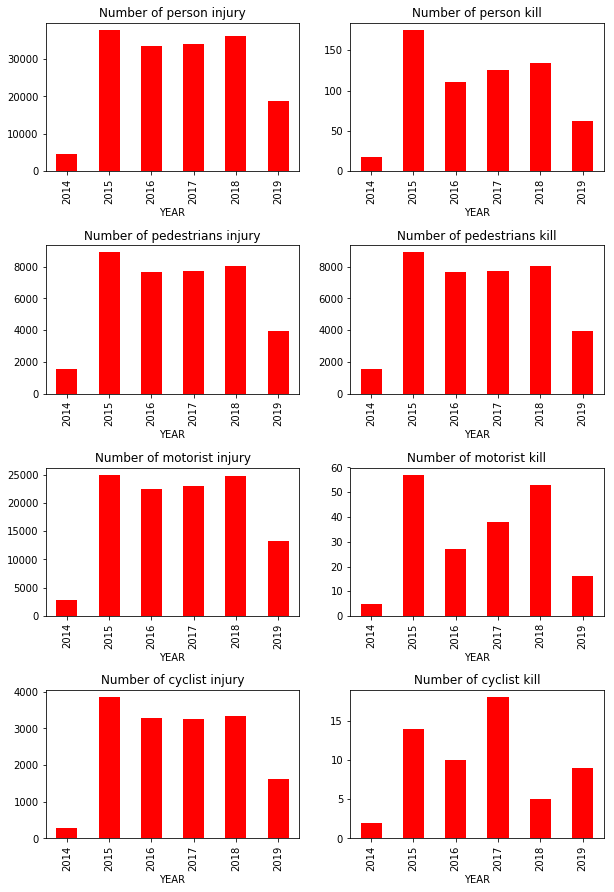

In [91]:
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5), plt.subplot(4, 2 ,1)
df.groupby('YEAR').NUM_PER_INJUR.sum().plot.bar(color='red').set_title('Number of person injury'), plt.subplot(4, 2, 2)
df.groupby('YEAR').NUM_PER_KILL.sum().plot.bar(color='red').set_title('Number of person kill'), plt.subplot(4, 2, 3)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar(color='red').set_title('Number of pedestrians injury'), plt.subplot(4, 2, 4)
df.groupby('YEAR').NUM_PED_INJUR.sum().plot.bar(color='red').set_title('Number of pedestrians kill'), plt.subplot(4, 2, 5)
df.groupby('YEAR').NUM_MOTOR_INJUR.sum().plot.bar(color='red').set_title('Number of motorist injury'), plt.subplot(4, 2, 6)
df.groupby('YEAR').NUM_MOTOR_KILL.sum().plot.bar(color='red').set_title('Number of motorist kill'), plt.subplot(4, 2, 7)
df.groupby('YEAR').NUM_CYC_INJUR.sum().plot.bar(color='red').set_title('Number of cyclist injury'), plt.subplot(4, 2, 8)
df.groupby('YEAR').NUM_CYC_KILL.sum().plot.bar(color='red').set_title('Number of cyclist kill')

Let's start visualizing the effect of motor vehicle accidents in New york city. NYC suffered widespread motor vehicle accidents which caused number of persons to death and injury. Let's analyze the effect of this crisis, and compare NYC motor vehicle accidents by borough. Let's do that using a bar charts for the years 2014 to 2019. After dropping unwanted columns, cleaning up NaNs, the columns are renamed so that we can recall them variables easier and new variables are created including year of accident for future analysis, the number of person injured can be plotted by year. From the above bar chart, we can see that during 2015 there were highest number of person injury, number of person killed, number of cyclist injury but not number of cyclist killed. The year 2014 is seen as the lowest number of injury and death happened in all cases for pedestrians, cyclists and motorists. Apparently, in the years 2015 to 2018 the number of individuals injured as well as killed is a bit high but not 2019 since it is not full year data because the dataset is used up to the time when the dataset was downloaded. When comparing the number of pedestrians injured and killed, it seems almost similar trend from 2015 to 2018 that is about 8,000 deaths  and almost the same number of injuries in these years. In 2014 it seems bellow 2000 injuries and deaths but the 2019 data is incomplete. As we can see the number of motorist injured over time is very high, it is nearly 25000 in 2015, 2016, 2017 and 2018 but in 2014 it was bellow 5000. The number of motorist killed in these years was very few in number. This graphical information is supported by the above tables showing descriptive statistical summaries. Besides the insurance company, all these informations can also be used by the new york city road transport agency in order to formulate policy to help hinder these accidents using various methods such as installing new traffic lights or could be increasing the number of lanes and so on. Although the above bar charts are useful when comparing the number of persons injured versus the number of perssons killed across the pedestrians, cyclists and motorists, it would be nice if we could put these data on a map using their geographical coordinates. This could be achieved through using the folium library in python. 

Text(0.5, 1.0, 'Number of cyclist kill')

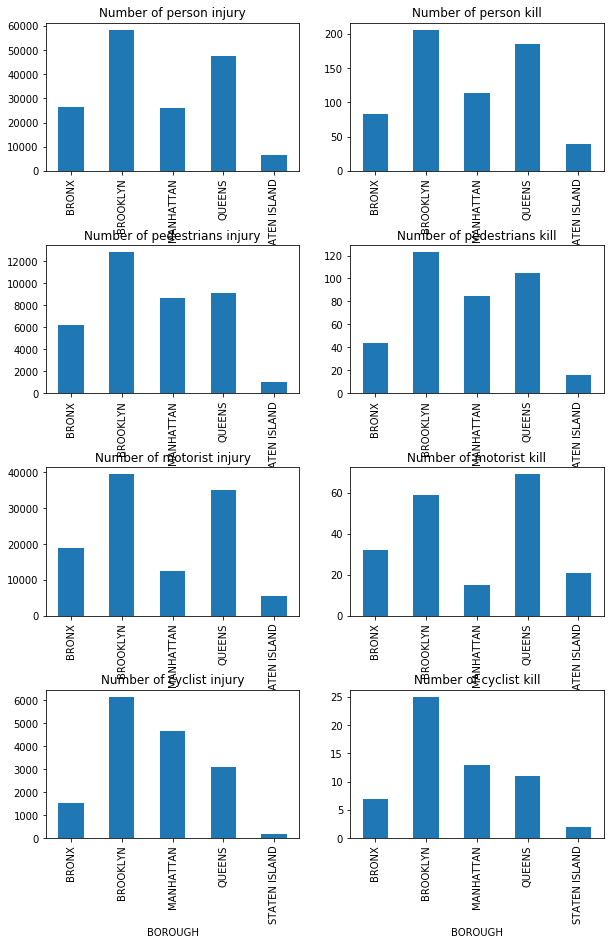

In [92]:
plt.figure(figsize=(10, 15)).subplots_adjust(hspace=0.5), plt.subplot(4, 2 ,1)
df.groupby('BOROUGH').NUM_PER_INJUR.sum().plot.bar().set_title('Number of person injury'), plt.subplot(4, 2, 2)
df.groupby('BOROUGH').NUM_PER_KILL.sum().plot.bar().set_title('Number of person kill'), plt.subplot(4, 2, 3)
df.groupby('BOROUGH').NUM_PED_INJUR.sum().plot.bar().set_title('Number of pedestrians injury'), plt.subplot(4, 2, 4)
df.groupby('BOROUGH').NUM_PED_KILL.sum().plot.bar().set_title('Number of pedestrians kill'), plt.subplot(4, 2, 5)
df.groupby('BOROUGH').NUM_MOTOR_INJUR.sum().plot.bar().set_title('Number of motorist injury'), plt.subplot(4, 2, 6)
df.groupby('BOROUGH').NUM_MOTOR_KILL.sum().plot.bar().set_title('Number of motorist kill'), plt.subplot(4, 2, 7)
df.groupby('BOROUGH').NUM_CYC_INJUR.sum().plot.bar().set_title('Number of cyclist injury'), plt.subplot(4, 2, 8)
df.groupby('BOROUGH').NUM_CYC_KILL.sum().plot.bar().set_title('Number of cyclist kill')

Comparing the five boroughs with the number of pedestrians injured, it is evident that Brooklyn is significantly higher than the other four. The same interpretation can be applied when comparing the number of pedestrians killed with borough, Brooklyn again is significantly higher than the other four boroughs. Staten Island has a very small number of pedestrians injured and killed. When we consider the number of motorists injury, Staten Island has about 5000 where as Brooklyn has nearly 4000 and Queen nearly 35000, Bronx about 20000 and Manhatan 15000. With respect to the number of motorists killed, Staten Island has smallest bar. With respect to the number of cyclists injured, Staten Island looks negligible number and the number of cyclists killed in Staten Island is bellow five. Thus the number of persons injured as well as killed considering pedestrians, cyclists and motorists in Staten Island has the smallest number. It looks like the Brooklyn, Manhatan and Bronx contribute the majority number of accidents to the report this is probably these areas are the most busy boroughs in New York city. Therefore this borough category will be used to explore the neighborhoods and search for the different venues in each neighborhood using foursquare API data.


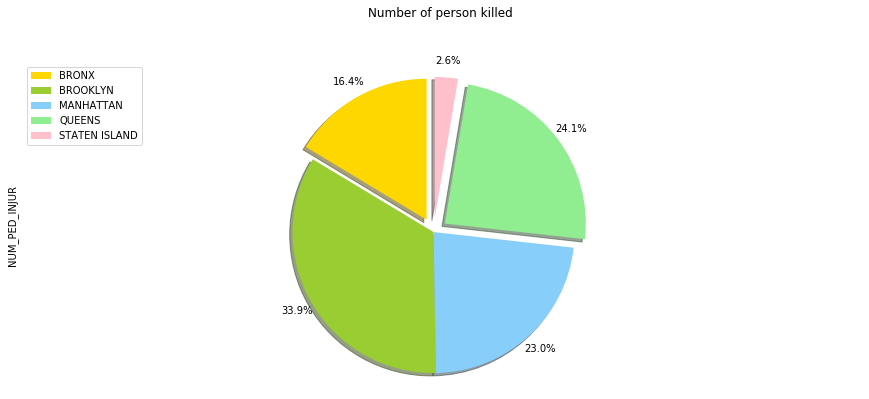

In [93]:
colors_list = ['gold', 'yellowgreen', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
df_borough['NUM_PED_INJUR'].plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,pctdistance=1.12,colors=colors_list,explode=explode_list)
plt.title('Number of person killed', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_borough.index, loc='upper left') 
plt.show()

Another way of presenting the data graphically is using pie charts. A pie chart is a graphical data analysis technique for summarizing the distributional information of a variable. It is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices where the size of each slice is proportional to the frequency (number of observations) in that slice. Let's use a pie chart to explore the proportion (percentage) of number of pedestrians injury grouped by borough for the data of the entire time period from 2014 to 2019. Using the above pie chart, the smallest number of pedestrians injured occurred in Staten Island accounting only 2.6 percent and the highest number of pedestrians injured is in Brooklyn 33.9 percent followed by Queens 24.1 percent and Manhatan 23.0 percent. The pie charts for the number of pedestrians killed, the number of cyclists killed, the number of cyclists injured, the number of motorists killed and the number of motorists injured are not displayed here but the results showed that Staten Island accounts the lowest proportion of the accidents. 

Text(0, 0.5, 'number killed')

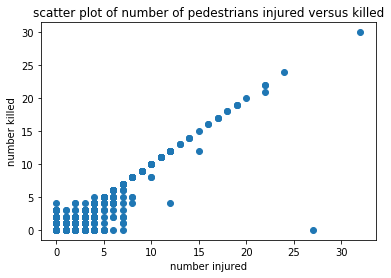

In [94]:
plt.scatter(df["NUM_PER_INJUR"], df["NUM_MOTOR_INJUR"])
plt.title("scatter plot of number of pedestrians injured versus killed")
plt.xlabel("number injured")
plt.ylabel("number killed")

We can show the distribution of accidents using a scatter plot; the Y-axis indicates number of motorists injured and the X-axis shows number of person injured. A scatter plot is a useful method of comparing the relationship between two variables. The data in a scatter plot is considered to express a trend. As shown in the figure above there seems to be a strong correlation between number of motorists injured and number of persons injured since there is a pattern in the data as the number of motorists injured go by, the number of persons injured show a trend. We can examine the correlation between number of motorists injured and number of persons injured and it is approximately 0.873, a high correlation, the estimate of the correlation coefficient indicates there is a positive relationship between these two variables. There seems to be no correlation between number of pedestrians injured and number of pedestrians killed since there is no pattern in the data as the number of pedestrians injured go by, the number of pedestrians killed doesn't show any trend. We can examine the correlation between number of pedestrians injured and number of pedestrians killed and it is approximately 0.0.00027, the correlation coefficient is almost negligible,  the estimate of the correlation coefficient indicates there is no relationship between these two variables. We can display the scatter plot and notice how the relationship between the number of cyclists injured and number of cyclists killed the same way as performed above.

In [95]:
df[['NUM_PER_INJUR', 'NUM_PER_KILL', 'NUM_PED_INJUR', 'NUM_PED_KILL', 'NUM_CYC_INJUR', 'NUM_CYC_KILL', 'NUM_MOTOR_INJUR', 'NUM_MOTOR_KILL']].corr()  

,NUM_PER_INJUR,NUM_PER_KILL,NUM_PED_INJUR,NUM_PED_KILL,NUM_CYC_INJUR,NUM_CYC_KILL,NUM_MOTOR_INJUR,NUM_MOTOR_KILL
NUM_PER_INJUR,1.000000,-0.045319,-0.130552,-0.045317,-0.129823,-0.017002,0.872942,-0.011213
NUM_PER_KILL,-0.045319,1.000000,-0.011713,0.788259,-0.020409,0.346812,-0.023313,0.548353
NUM_PED_INJUR,-0.130552,-0.011713,1.000000,0.000270,-0.224594,-0.002640,-0.492941,-0.020584
NUM_PED_KILL,-0.045317,0.788259,0.000270,1.000000,-0.016559,0.075249,-0.030039,0.011563
NUM_CYC_INJUR,-0.129823,-0.020409,-0.224594,-0.016559,1.000000,-0.000274,-0.307898,-0.014282
NUM_CYC_KILL,-0.017002,0.346812,-0.002640,0.075249,-0.000274,1.000000,-0.011852,-0.000808
NUM_MOTOR_INJUR,0.872942,-0.023313,-0.492941,-0.030039,-0.307898,-0.011852,1.000000,0.005447
NUM_MOTOR_KILL,-0.011213,0.548353,-0.020584,0.011563,-0.014282,-0.000808,0.005447,1.000000


As the number of motorist injured goes up, the number of persons injured goes up (the correlation coefficient is positive and it is approximately 0.873): this indicates a positive relationship between these two variables. As the number of persons injured increases the number of persons killed decreases as these two variables have a negative correlation coefficient, but there is a very week correlation of -0.045. Looking at the above output, there seems to be a high correlation between number of pedestrians killed and number of persons killed, and it is approximately 0.788. We can examine the correlation between number of cyclist injured and number of pedestians killed and it's -0.0166. As the number of cyclist injured increases, the number of pedestians killed decreases (the correlation coefficient is negative), the correlation coefficient is almost zero this indicates a the two variables most likely do not affect each other. The correlation between number of motorist killed and number of persons killed is approximately 0.548 which shows that the relationship is positive and moderately strong.  

The dataframe consists of 124868 accidents, which took place through the years 2014 to 2019. In order to reduce computational cost, let's just work with the first 100 accidents in this dataset. Once the dataset is reduced, we will visualize where these accidents took place in the city of New York. We will use the default style and we will initialize the zoom level to 12. Now let's superimpose the locations of the accidents onto the map. The way to do that in Folium is to create a feature group with its own features and style and then add it to the map. While the above bar charts are useful when comparing different categories, it would be nice if we could put these data on a map using their latitude and longitude coordinates. There are several python packages that allows us to plot geospatial data. Here we choose to use folium. There! A New York city borough level motor vehicle collisions map. In addition to the map, we also superimpose the map by creating popups (green dots) that display New York city motor vehicle data. So far we have the motor vehicle collisions map, next we are going to study the neighborhoods using Foursquare APIs. 

In [96]:
nyc_map.add_child(incidents)

# Part II

         
The Staten Island is taken to further explore the neighborhoods within the borough by utilizing the Foursquare API, the explore function is used to get the top ten most common venues in each neighborhood, and then this feature is used to group the neighborhoods into different clusters according to some similarity measures so that the neighborhoods with similar venues grouped together and then the insurance company can choose the area of their interest based on the venues available. After the neighborhoods are clustered using  k-means clustering algorithm, the Folium library is used to visualize the neighborhoods clusters.


In [97]:
StatenIsland_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,St. George Theatre,40.642253,-74.077496,Theater


So far, the motor vehicle collisions dataset is explored graphically as well as various descriptive statistical methods were considered, here we are going to study these neighborhoods using Foursquare APIs. For each neighborhood in Staten Island, the Foursquare explore function returns a list of top 100 venues within a radius of 500 meters. The names of the neighborhoods together with their latitude and longitude values as well as the venues within each neighborhoods, the venues latitudes, longitudes and the venue categories are obtained.

In [98]:
StatenIsland_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,0,Clothing Store,Bar,Italian Restaurant,Snack Place,Donut Shop,Bus Stop,Sporting Goods Shop,Scenic Lookout,Monument / Landmark,Steakhouse
1,Staten Island,New Brighton,40.640615,-74.087017,4,Bus Stop,Deli / Bodega,Park,Convenience Store,Playground,Discount Store,Bowling Alley,Flower Shop,Filipino Restaurant,Fast Food Restaurant
2,Staten Island,Stapleton,40.626928,-74.077902,0,Mexican Restaurant,Bank,Restaurant,Sandwich Place,Discount Store,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Pharmacy
3,Staten Island,Rosebank,40.615305,-74.069805,0,Pizza Place,Italian Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot,Beach,Pharmacy,Restaurant,Sandwich Place,Park
4,Staten Island,West Brighton,40.631879,-74.107182,0,Coffee Shop,Bank,Cosmetics Shop,Music Store,Italian Restaurant,Bar,Pharmacy,Vegetarian / Vegan Restaurant,Sushi Restaurant,Fast Food Restaurant
5,Staten Island,Grymes Hill,40.624185,-74.087248,0,American Restaurant,Video Store,Deli / Bodega,Moving Target,Dog Run,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant
6,Staten Island,Todt Hill,40.597069,-74.111329,3,Park,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner
7,Staten Island,South Beach,40.580247,-74.079553,0,Beach,Pier,Deli / Bodega,Athletics & Sports,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Staten Island,Port Richmond,40.633669,-74.129434,0,Rental Car Location,Martial Arts Dojo,Deli / Bodega,Playground,Pizza Place,Mexican Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Event Space
9,Staten Island,Mariner's Harbor,40.632546,-74.150085,0,Italian Restaurant,Deli / Bodega,Athletics & Sports,Bus Stop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


After one hot encoding of the venue dataset based on venue category, the rows were grouped by neighborhoods and by taking the mean of the frequency of occurrence of each category. Afterwards, each neighborhood along with the top ten most common venues are presented here. The results created bellow includes the cluster group as well as the top ten venues for each neighborhood. The k-means algorithm is applied to cluster the neighborhoods to the one-hot encoded venue dataset under the assumption that there are five clusters, the resulting cluster are shown in the above output and the map below presents the same result.  
As we can see from the map, a lot of the neighborhoods are in the green cluster. When we actually look at the green cluster, it becomes clear that the most common venues in the neighborhoods are found in cluster 3. A large number of neighborhoods are grouped in this cluster and the list of the available venues are Train Station, Bus Stop, restaurants; bar, Coffee Shop, Sri Lankan Restaurant/Caribbean/Chinese/Japanese/Mexican/Italian/American restaurants, Rental Car Location, Pharmacy, Residential Building (Apartment / Condo), Bank, Gym, Park and Book Store. So this cluster would be convenient due to a variety of venues found here. Thus, the neighborhoods in this cluster would be a candidate to launch a new office in Staten Island. By calling Foursquare API again and narrow our search to the car traffic and pedestrians, we could obtain a detailed map of vehicle traffic in these neighborhoods.

In [99]:
map_clusters


The above visualization shows the clustered neighborhoods and the clusters can easily be accessed to see which neighborhoods are assigned which cluster among the five clusters. We can see that most of the neighborhoods are blue coded which is cluster three followed by gray coded clusters which is cluster two. Three of the neighborhoods are assigned their own clusters (orange, red and yellow)which are clusters one, four and five.

### Cluster 1
In this part we will examine each cluster and determine the venue categories that distinguish each cluster. Out of the 62 neighborhoods that are found in Staten Island, 13 of them are in this cluster. When we look at these neighborhoods, the most common venues found in these neighborhoods are bus stop, restaurants such as Italian restaurant, French restaurant, Filipino Restaurant, Food & Drink Shop; stores etc...

In [100]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 0, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Clothing Store,Bar,Italian Restaurant,Snack Place,Donut Shop,Bus Stop,Sporting Goods Shop,Scenic Lookout,Monument / Landmark,Steakhouse
2,Stapleton,Mexican Restaurant,Bank,Restaurant,Sandwich Place,Discount Store,Café,Pizza Place,Asian Restaurant,Fast Food Restaurant,Pharmacy
3,Rosebank,Pizza Place,Italian Restaurant,Grocery Store,Mexican Restaurant,Breakfast Spot,Beach,Pharmacy,Restaurant,Sandwich Place,Park
4,West Brighton,Coffee Shop,Bank,Cosmetics Shop,Music Store,Italian Restaurant,Bar,Pharmacy,Vegetarian / Vegan Restaurant,Sushi Restaurant,Fast Food Restaurant
5,Grymes Hill,American Restaurant,Video Store,Deli / Bodega,Moving Target,Dog Run,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant
7,South Beach,Beach,Pier,Deli / Bodega,Athletics & Sports,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Port Richmond,Rental Car Location,Martial Arts Dojo,Deli / Bodega,Playground,Pizza Place,Mexican Restaurant,Bus Stop,Donut Shop,Falafel Restaurant,Event Space
9,Mariner's Harbor,Italian Restaurant,Deli / Bodega,Athletics & Sports,Bus Stop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
11,Castleton Corners,Pizza Place,Mini Golf,Tattoo Parlor,Bar,Bank,Sandwich Place,Bagel Shop,Grocery Store,Japanese Restaurant,Hardware Store
12,New Springville,Bagel Shop,Health & Beauty Service,Chinese Restaurant,Accessories Store,Mexican Restaurant,Mobile Phone Shop,Burger Joint,Spa,Soup Place,Optical Shop


### Cluster 2
When we look at this cluster, the only neiborhood is Grymes Hill which consists of the venues; Dog Run, Bus Stop, Yoga Studio,  Fast Food Restaurant, Furniture / Home Store, French Restaurant, Food Truck, Food & Drink Shop, Food and Flower Shop.

In [101]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 1, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,Yoga Studio,Food & Drink Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant


### Cluster 3
When we look at this cluster, the only neiborhood is Todt Hill which consists of the venues; Park, Yoga Studio, Department Store, Furniture / Home Store, French Restaurant, Food Truck, Food & Drink Shop, Food, Flower Shop and Filipino Restaurant.

In [102]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 2, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Silver Lake,American Restaurant,Burger Joint,Golf Course,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space


### Cluster 4
This cluster group has the biggest number of neighborhoods in it, 46 out of 62 neighborhoods are grouped here. The most common venues in these neighborhoods are Construction & Landscaping, restaurants, bus stop, stores (Liquor store, accessories store, Discount store music store and Grocery Store) Monument / Landmark and Athletics & Sports.

In [103]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 3, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Todt Hill,Park,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner


### Cluster 5
When we look at this cluster, the only neighborhood is Port Ivory which consists of the venues; Bar, Yoga Studio, Gastropub, Furniture / Home Store, French Restaurant, Food Truck, Food & Drink Shop, Food, Flower Shop and Filipino Restaurant.

In [104]:
StatenIsland_merged.loc[StatenIsland_merged['Cluster_Labels'] == 4, StatenIsland_merged.columns[[1] + list(range(5, StatenIsland_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Deli / Bodega,Park,Convenience Store,Playground,Discount Store,Bowling Alley,Flower Shop,Filipino Restaurant,Fast Food Restaurant
15,Oakwood,Chiropractor,Bus Station,Bus Stop,Bar,Yoga Studio,Eastern European Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
24,Park Hill,Bus Stop,Hotel,Coffee Shop,Athletics & Sports,Gym / Fitness Center,Yoga Studio,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
27,Arlington,Bus Stop,American Restaurant,Deli / Bodega,Coffee Shop,Yoga Studio,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
41,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant
42,Greenridge,Diner,Pizza Place,Lawyer,Bus Stop,Yoga Studio,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
44,Chelsea,Steakhouse,Sandwich Place,Park,Bus Stop,Yoga Studio,Donut Shop,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant
45,Bloomfield,Bus Stop,Recreation Center,Park,Discount Store,Theme Park,Yoga Studio,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
52,Randall Manor,Park,Bus Stop,Bagel Shop,Yoga Studio,Dry Cleaner,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
62,Fox Hills,Bus Stop,Grocery Store,Sandwich Place,Dog Run,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dry Cleaner


## 5. Discusion and Conclusion
In this study we compared the motor vehicle collisions data of New York city by borough category. The objective of this project was to select one borough among five boroughs and to use foursquare API to search for the most common venues for each neighborhood based on a given borough. There are two datasets used for this study, the first one is about the motor vehicle collisions data of New York city and the second dataset used to explore the neighborhoods and cluster them is obtained from the website. In order to address the objective of the study, we have considered descriptive statistics as well as graphical displays such as bar graph, pie charts, scatter plots and a using maps. As we have seen from the graphs in the exploratory data analysis, Staten Island has the lowest number of injuries and deaths. To undertake clustering we used K-means algorithm with a pre specified number of five cluster groups. To visualize the different clusters, the data is color coded with different colors for each cluster group and Folium library is used to render the map. The clustered ten most common venues for each neighborhood in Staten Island are presented. Once the borough with the lowest accident is chosen, the insurance company can choose any neighborhood based on the interest of the availabe clustered venues. 

Based on the analysis described in this report we can conclude that there is a difference in the the number of accidents between the borough categories and Staten Island is the one chosen due to the lowest number of injuries and deaths. This analysis helps the insurance company get a better understanding of the neighborhoods with respect to the most common venues. The choice of venues depend on the interest of the insurance company what they want to to select a neighborhood. For instance, if they would like a neighborhood with restaurants, bus stops, rental car locations, hotels, stores, history museum and electronics stores definately cluster four would be the one chosen. If the most common venues the insurer wants are banks, sports clubs, pharmacy, park, beach and IT services cluster one would be the primary choice.